# Assignment 1

Alexander Boozer
PHYS 421 Assignment 1

## Question 1 - Root finding using bisection method

Begin by considering the polynomial:

$f(x) = 1.80 - 4.05x + 0.40x^2 + x^3$
 
which has three real roots at $x=-2.5,0.5,1.5$.

a)	Calculate the roots of this polynomial using the bisection algorithm. You can start with the file called root_find_basic.ipynb and then modify as appropriate.  The program should fill an array of 10,000 data points between $x=-4.0$ and $x=4.0$.  Then, the program should do a sparse search of this array, i.e. once every n_search elements, to look for sign changes, and subsequently using the bisection algorithm to find the root.  The program should also keep track of the time taken to find the roots.

b)	Create a plot of the time taken to find the roots vs. the sparsification size (n_search), for n_search values between 1 and 10,000.  You can start with root_find_complete.ipynb and then modify it.

c)	Deduce the source of the various patterns that you observe in part b).  Hint:  You might consider adjusting the number of data points in the original array, as well as the coefficients of the polynomial, slightly.

d)	Modify the code created in part a) to allow for the possibility to find the roots of other polynomials or functions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

import time
import math

In [ ]:
# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x+par[4]*x*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 30000

dx = (xh-xl)/npoints

xroots = []
yroots = []

par = np.array([1.0,1.80,-4.05,0.4,1.0])

In [ ]:
# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [ ]:

# Define the size of the "slices" in x in which we will look for roots.
nsearch = 1000

# calculate the number of slices
niter = npoints/nsearch

# use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
ycomp = yval[0]
nroots_found = 0

# loop over the slices
for i in range(0,int(niter)):
    # Begin at the right most data point in the slice
    y = yval[nsearch*i]
    
    # Check to see if we got lucky and landed on an exact zero of the function
    if (y==0):
        print ("Found exact root at x = %f\n" % xval[nsearch*i])
        xroots.append(xval[nsearch*i])
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    # Otherwise, check to see if there is a root in between the left and right comparison points
    if (y*ycomp<0.0):
        # There is a root in the interval, so apply Newton's algorithm / bisection method
        #
        # First, get the x-values of the left and right ends of the slice
        xlow = xval[nsearch*(i-1)]
        xhigh = xval[nsearch*i]
        # define a "tolerance" at which point we will say we have found a zero
        epsilon = 1.48E-8
        
        diff = 1.0E12
        while (diff>epsilon):
            # Calculate the function values at the left, right, and midpoints of the slice
            fa = generator_function(xlow,*par)
            fb = generator_function(xhigh,*par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,*par)
            
            # Decide if the root is in the left half or right half of the interval, and redefine
            # the x interval accordingly
            product = fa*fc
            if (product < 0):
                xhigh = xmid
            else:
                xlow = xmid

            # update the difference value
            diff = np.abs(fc)

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
        
        # move to the next slice
        ycomp = y
    else:
        # move to the next slice
        ycomp = y

print ("Total number of roots found = %d\n" % nroots_found)

end = time.time()
print(end - start)
time_ejb = (end-start)

Found root at x = -2.361684

Found root at x = -0.321517

Total number of roots found = 2

14898.011358976364


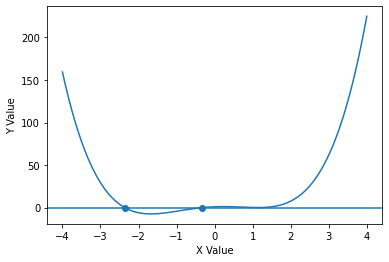

In [ ]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate 
axs.plot(xval,yval)
axs.scatter(xroots,yroots)
axs.set_ylabel('Y Value')
axs.set_xlabel('X Value')
axs.axhline()
plt.show()

Observations: So, when adding a fourth point to the polynomial, you can only find two roots. When I set the npoints to a higher number like 30,000, the roots on the graph remained the same.


## Question 2 - Fitting data

a) Go to the following site and retrieve data on the density of air as a function of altitude:

http://www.engineeringtoolbox.com/standard-atmosphere-d_604.html

Make sure to use the second table, in SI units.  

b) Modify the Jupyter Notebook that we went through in class for Linear Regression to fit the density data as a function of altitude using a function of the form:

$f(x)= Ae^{Bx+C\sqrt{x}}$

c) Determine the parameters A, B, and C, as well as the uncertainties on these parameters.

d) Plot the fit, including 95% confidence interval error bands, along with the data.  What is your evaluation of the quality of the fit?  Can you think of a different approach that might yield a better fit?

In [ ]:
url = 'https://raw.githubusercontent.com/aBoozer17/phys421/master/JupyterNotebooks/standard_atmosphere.txt'
df = pd.read_csv(url)
#df.head(100)

Coefficients (from curve_fit)
[ 41502.4922892  -42080.95396517]
Covariance Matrix (from curve_fit)
[[ 25786345.16932784 -28779839.33897381]
 [-28779839.33897381  59484517.94498615]]


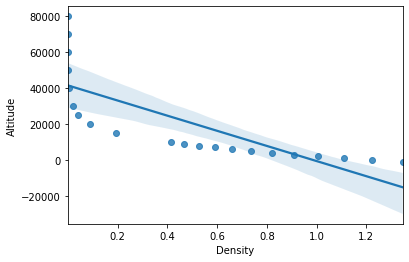

In [ ]:
import seaborn as sns
sns.regplot('Density', 'Altitude', df, ci=95)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x
    #return paramlist[0]*math.e**(paramlist[1]*x+paramlist[2]*math.sqrt(x))

init_vals = [0.0 for x in range(2)]
x = np.array(df['Density'])
y = np.array(df['Altitude'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

#plt.plot(xi,lower)
#plt.plot(xi,upper)
plt.show()

Observations: So we have a couple of outliners at the density below 0.2 and the altitude from 60000 to 80000.